## Implementation of Regression Model to confirm if there is a relationship between the two sets of columns, (1) “age” and “bmi” and (2) “age” and “charges” from the given data, using Python in jupyter notebook.
## Student Name: Gargi Darade.
## Subject/Class: CMPS 451 Artificial Intelligence.


In [1]:
#Step 1:- Import the required libraries
#Numpy for statistical computations
#Matplotlib to plot the graph 
#make_blobs from sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#!pip install tensorflow  
import tensorflow as tf

In [86]:
#load data from csv file
data_path = 'insurance.csv'

# create pandas dataframe
df = pd.read_csv(data_path)

# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

# print out sample dataset
print("Total records:",len(df))
df.shape
df.head()


Total records: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
# filter the columns by only the required_columns
required_cols = ['age', 'bmi', 'charges']
df = df[required_cols]
df.head()
# check number of nan values in dataframe
df.isna().sum()

age        0
bmi        0
charges    0
dtype: int64

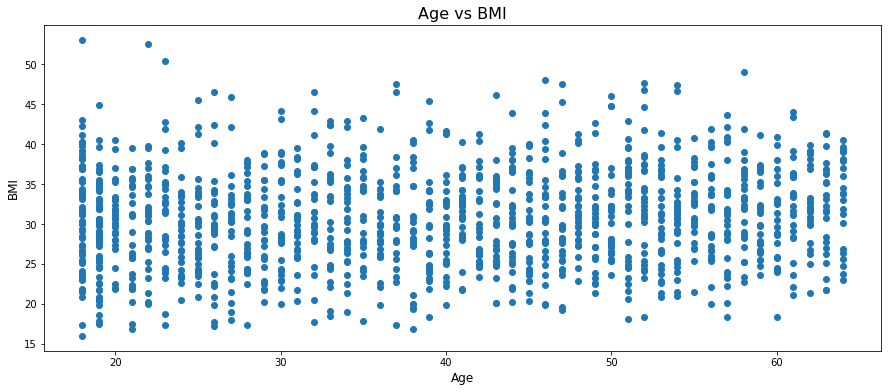

In [89]:
#to check relation plot scatter plot
plt.scatter('age', 'bmi', data=df);
plt.title('Age vs BMI', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.savefig("AgeVsBMI.png")
plt.show()

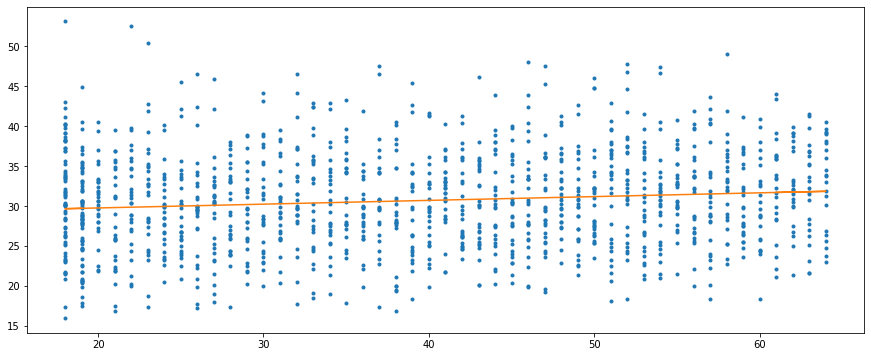

In [90]:
from numpy.polynomial.polynomial import polyfit
# Fit with polyfit
# Sample data
x = df['age']
y = df['bmi']
b, m = polyfit(x,y , 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.savefig("AgeVsBMIFt.png")
plt.show()

## The above plots proves no relation between Age and BMI (slope is zero)

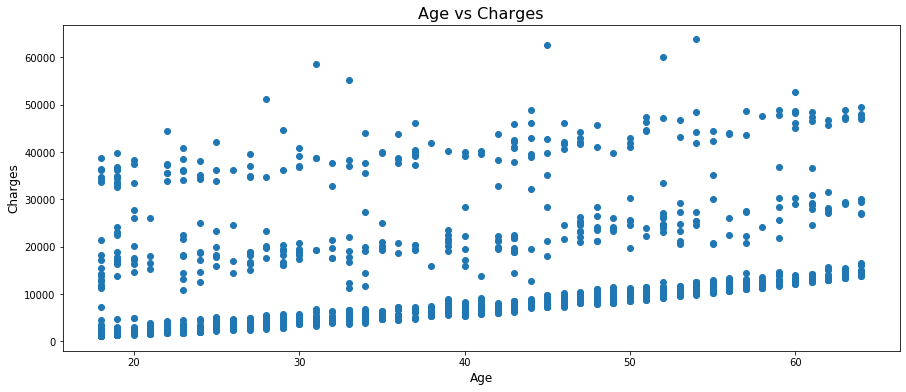

In [91]:
plt.scatter('age', 'charges', data=df);
plt.title('Age vs Charges', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.savefig("AgeVsCharges.png")
plt.show()

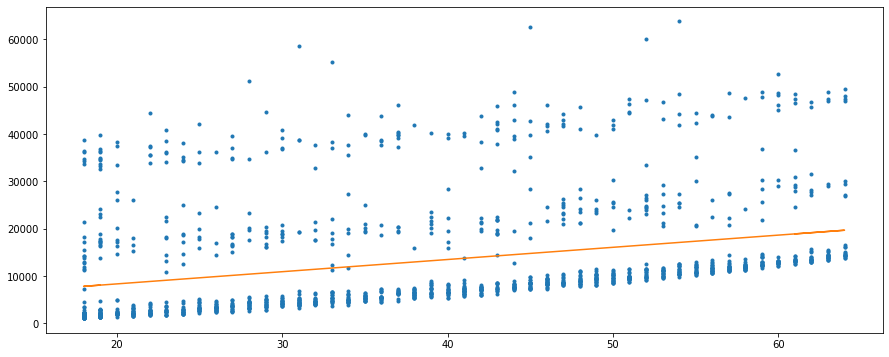

In [96]:
from numpy.polynomial.polynomial import polyfit
# Fit with polyfit
# Sample data
x = df['age']
y = df['charges']
#sns.regplot(x=x, y=y)
b, m = polyfit(x,y , 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.savefig("AgeVsChargesFt.png")
plt.show()

## The above plots proves weak relation between Age and Charges.

## calculate the Pearson's correlation between two variables
#### The positive correlation between the two variables is strong, if it surpasses the 0.5 threshold and approaches 1.0

In [97]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['age'], df['bmi'])
print('Pearsons correlation between Age and BMI: %.3f' % corr)
corr, _ = pearsonr(df['age'], df['charges'])
print('Pearsons correlation between Age and Charges: %.3f' % corr)

Pearsons correlation between Age and BMI: 0.109
Pearsons correlation between Age and Charges: 0.299


### If you are unsure of the distribution and possible relationships between two variables,  the Spearman correlation coefficient is a good tool to use.

In [98]:

from scipy.stats import spearmanr
corr, pvalue = spearmanr(df['age'], df['bmi'])
print('Spearman’s correlation between Age and BMI: %.3f' % corr)
#print(f"P-value: {pvalue}")
corr, pvalue = spearmanr(df['age'], df['charges'])
print('Spearman’s correlation between Age and Charges: %.3f' % corr)
#print(f"P-value: {pvalue}")

Spearman’s correlation between Age and BMI: 0.108
Spearman’s correlation between Age and Charges: 0.534


### Better than pearsons but not that strong.

# What if we use log transformation on Charges

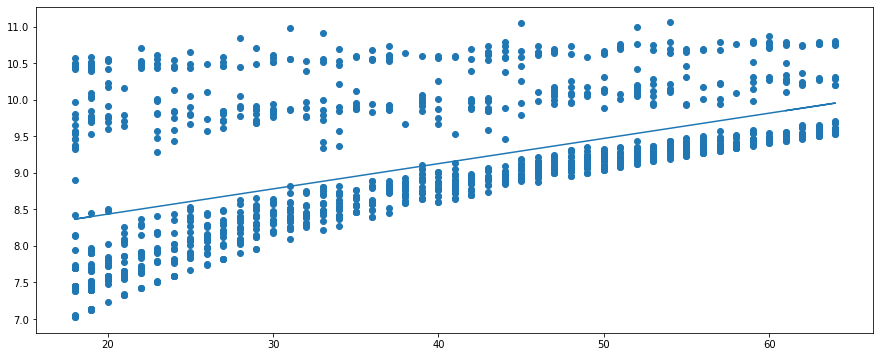

In [100]:
x = df['age']
y = df['charges']
slope, intercept = np.polyfit(x, np.log(y), 1)

plt.figure()
plt.scatter(x, np.log(y))
plt.plot(x, (slope*x)+intercept)
plt.savefig("AgeVsLogChargesFt.png")
plt.show() 

In [103]:

from scipy.stats import spearmanr
corr, pvalue = spearmanr(df['age'], df['charges'])
print('Spearman’s correlation between Age and charges: %.3f' % corr)
#print(f"P-value: {pvalue}")
corr, pvalue = spearmanr(df['age'], np.log(df['charges']))
print('Spearman’s correlation between Age and Log Charges: %.3f' % corr)
#print(f"P-value: {pvalue}")

Spearman’s correlation between Age and charges: 0.534
Spearman’s correlation between Age and Log Charges: 0.534


## Ordinary least squares (OLS) regression is an optimization strategy used in linear regression models 
### that finds a straight line that fits as close as possible to the data points, in order to help estimate the relationship between a dependent variable and one or more independent variables

const    3165.885006
age       257.722619
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           4.89e-29
Time:                        14:20:24   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

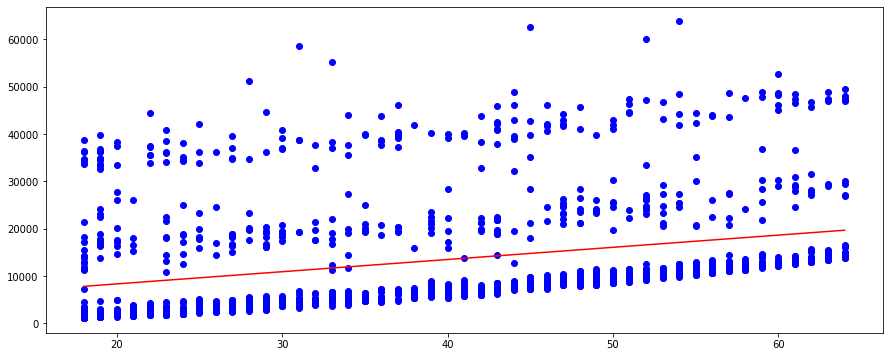

In [111]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
x = df['age']
y = df['charges']
results = sm.OLS(y,sm.add_constant(x)).fit()
print(results.params)
print(results.summary())


mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=results.params[1]*x1+results.params[0]
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.savefig("OLSRegAgeVsChargesFt.png")
plt.show()

## Ordinary least squares (OLS) regression using log transformation on Charges

const    7.744247
age      0.034545
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     516.0
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           7.48e-97
Time:                        16:04:14   Log-Likelihood:                -1567.3
No. Observations:                1338   AIC:                             3139.
Df Residuals:                    1336   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

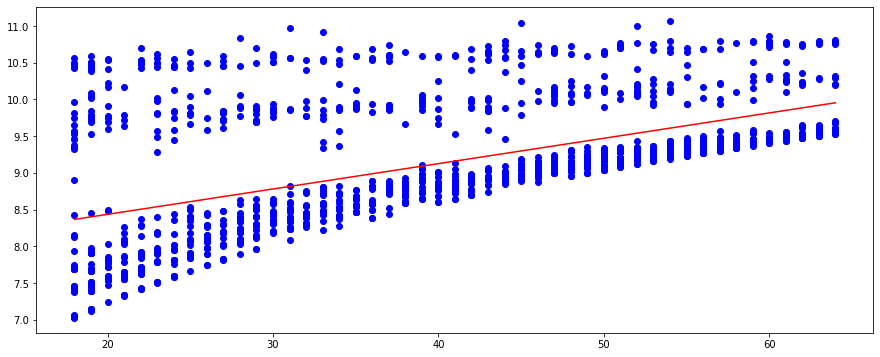

In [112]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
x = df['age']
y =  np.log(df['charges'])
results = sm.OLS(y,sm.add_constant(x)).fit()
print(results.params)
print(results.summary())


mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=results.params[1]*x1+results.params[0]
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.savefig("OLSRegAgeVsLogChargesFt.png")
plt.show()

 ### R-squared is 0.089 when charges are used as is, becomes R-squared 0.279 when log transformation is used on charges

slope: 0.03454513080663117
intercept: 7.744246908060742
r: 0.5278340489394343
p: 7.477385218968553e-97
std_err: 0.0015207983609832536


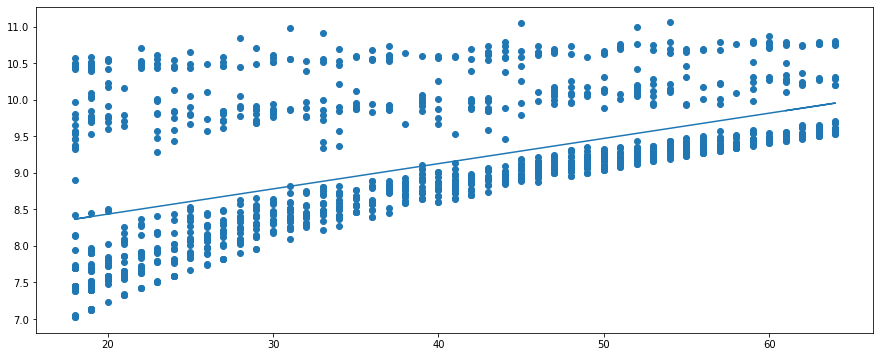

In [121]:
import matplotlib.pyplot as plt
from scipy import stats

x = df['age']
y =  np.log(df['charges'])
slope, intercept, r, p, std_err = stats.linregress(x, y)

def modelYval(x):
  return slope * x + intercept

mymodel = list(map(modelYval, x))
print("slope:",slope)
print("intercept:",intercept)
print("r:",r)
print("p:",p)
print("std_err:",std_err)
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.savefig("LinRegAgeVsLogChargesFt.png")
plt.show()

slope: 257.7226186668956
intercept: 3165.885006063023
r: 0.29900819333064776
p: 4.886693331718281e-29
std_err: 22.5023892867703


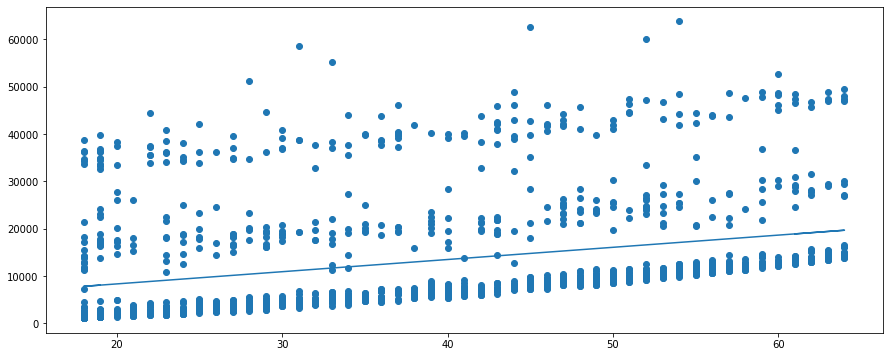

In [120]:
import matplotlib.pyplot as plt
from scipy import stats

x = df['age']
y =  df['charges']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def modelYval(x):
  return slope * x + intercept

mymodel = list(map(modelYval, x))
print("slope:",slope)
print("intercept:",intercept)
print("r:",r)
print("p:",p)
print("std_err:",std_err)
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.savefig("LinRegAgeVsChargesFt.png")
plt.show()

## Conclusion: from above regression analysis we can conclude that there is no relation between Age and BMI, but there is some weak relation between Age and charges.